In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
data=raw_data.copy()

In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data_nona=data.dropna()
data_nona.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
data_nona=data_nona.drop(['Model'],axis=1)
data_nona.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
data_nona.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


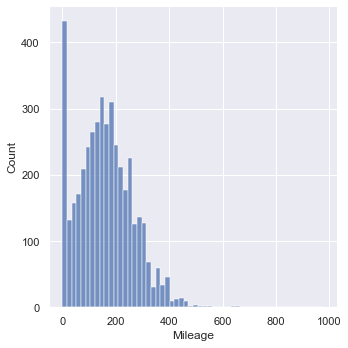

In [9]:
sns.displot(data['Mileage'])

In [10]:
q=data_nona['Mileage'].quantile(0.99)
data2=data_nona[data_nona['Mileage']<q]


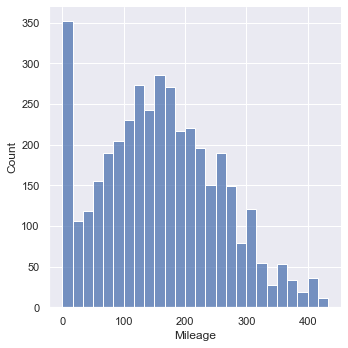

In [11]:
sns.displot(data2['Mileage'])

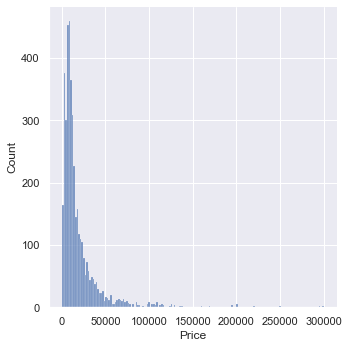

In [12]:
sns.displot(data['Price'])


In [13]:
q=data_nona['Price'].quantile(0.99)
data3=data2[data2['Price']<q]

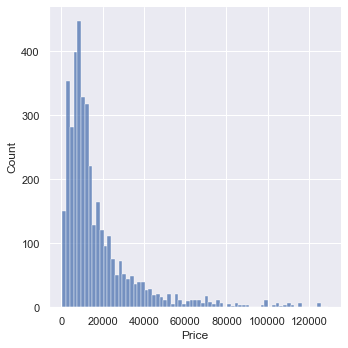

In [14]:
sns.displot(data3
            ['Price'])

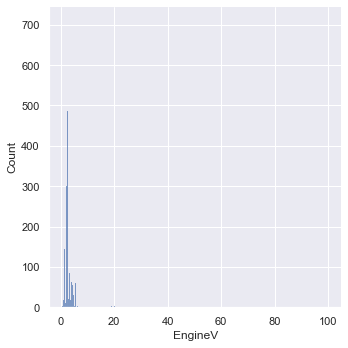

In [15]:
sns.displot(data['EngineV'])

In [16]:

data4=data3[data3['EngineV']<6.5]

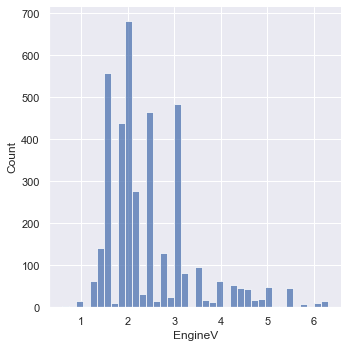

In [17]:
sns.displot(data4
            ['EngineV'])

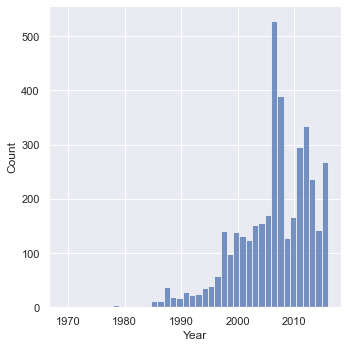

In [18]:
sns.displot(data4['Year'])

In [19]:
q=data4['Year'].quantile(0.01)
data5=data4[q<data4['Year']]

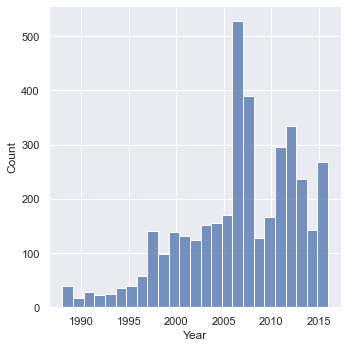

In [20]:
sns.displot(data5
            ['Year'])

In [21]:
data_cleaned=data5.reset_index()
data_cleaned.describe(include='all')

,index,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866.000000,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,NaN,7,NaN,6,NaN,NaN,4,2,NaN
top,NaN,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,NaN,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,2172.327988,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,1257.448301,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,0.000000,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,1078.250000,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,2174.500000,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,3269.750000,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


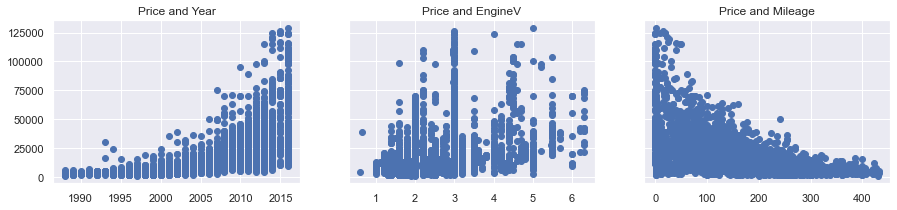

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [23]:
data_cleaned['log_price']=np.log(data_cleaned['Price'])
data_cleaned=data_cleaned.drop(['Price'],axis=1)
data_cleaned

,index,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,4338,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3862,4339,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,4341,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [24]:
data_cleaned.isnull().sum()

index           0
Brand           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
log_price       0
dtype: int64

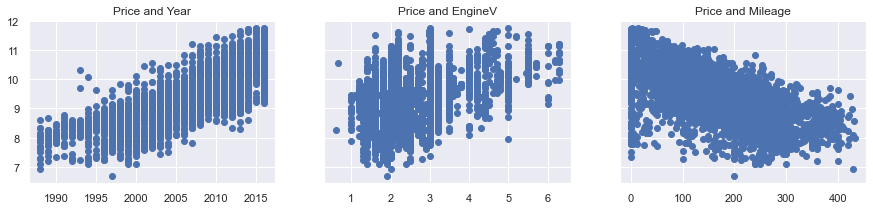

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')


plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables =data_cleaned[['Year','EngineV','Mileage']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [27]:
vif

,VIF,Features
0,10.360888,Year
1,7.660317,EngineV
2,3.794319,Mileage


In [28]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity


,index,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3861,4338,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3862,4339,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3863,4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3864,4341,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [29]:
data_cleaned_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first='True')

data_cleaned_with_dummies


,index,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,4338,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,4339,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,4340,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,4341,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [30]:
data_cleaned_with_dummies.columns

Index(['index', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [31]:
cols=['log_price','index', 'Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_prosecced=data_cleaned_with_dummies[cols]

In [33]:
data_prosecced

,log_price,index,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,9.350102,4338,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,9.792556,4339,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,11.736069,4340,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,8.779557,4341,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [34]:
x=data_prosecced.drop(['log_price'],axis=1)
y=data_prosecced['log_price']

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [37]:
x_scaled=scaler.transform(x)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=365)

In [40]:
reg=LinearRegression()

In [41]:
reg.fit(x_train,y_train)

LinearRegression()

In [42]:
y_hat=reg.predict(x_train)

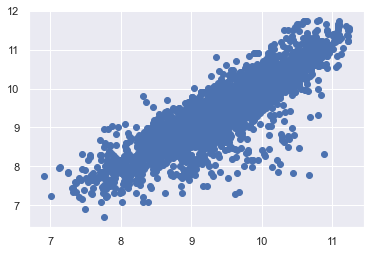

In [43]:
plt.scatter(y_hat,y_train)

In [44]:
y_test_hat=reg.predict(x_test)

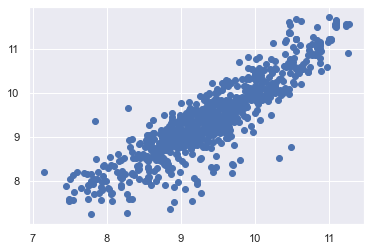

In [45]:
plt.scatter(y_test_hat,y_test)

In [56]:
summary=pd.DataFrame(columns={'y_test_hat':y_test_hat,'y_test':y_test})##対数化、インデックスのリセット忘れ
summary['y_test_hat']=np.exp(y_test_hat)
y_test=y_test.reset_index(drop='True')
summary['y_test']=np.exp(y_test)
summary

,y_test_hat,y_test
0,10640.371561,2300.0
1,8050.435172,13200.0
2,6814.023602,8100.0
3,7619.376761,6400.0
4,11294.992987,9150.0
...,...,...
769,14876.744468,29500.0
770,5743.614657,5300.0
771,13642.044116,18300.0
772,28074.103741,68500.0


In [57]:
summary['difference']=np.absolute(summary['y_test']-summary['y_test_hat'])
summary

,y_test_hat,y_test,difference
0,10640.371561,2300.0,8340.371561
1,8050.435172,13200.0,5149.564828
2,6814.023602,8100.0,1285.976398
3,7619.376761,6400.0,1219.376761
4,11294.992987,9150.0,2144.992987
...,...,...,...
769,14876.744468,29500.0,14623.255532
770,5743.614657,5300.0,443.614657
771,13642.044116,18300.0,4657.955884
772,28074.103741,68500.0,40425.896259


In [58]:
summary['df rate']=summary['difference']/summary['y_test']*100
summary

,y_test_hat,y_test,difference,df rate
0,10640.371561,2300.0,8340.371561,362.624850
1,8050.435172,13200.0,5149.564828,39.011855
2,6814.023602,8100.0,1285.976398,15.876252
3,7619.376761,6400.0,1219.376761,19.052762
4,11294.992987,9150.0,2144.992987,23.442546
...,...,...,...,...
769,14876.744468,29500.0,14623.255532,49.570358
770,5743.614657,5300.0,443.614657,8.370088
771,13642.044116,18300.0,4657.955884,25.453311
772,28074.103741,68500.0,40425.896259,59.015907


In [60]:
summary.describe()

,y_test_hat,y_test,difference,df rate
count,774.000000,774.000000,774.000000,774.000000
mean,16173.355297,18612.010504,5614.847322,33.812602
std,13749.659190,20953.006281,9575.789220,48.255692
min,1282.272843,1400.000000,5.662903,0.045303
25%,7479.767038,6999.250000,1017.506287,11.297454
50%,11564.489579,11500.000000,2541.012079,23.362580
75%,19702.675744,20500.000000,5643.626877,38.963638
max,77501.228891,124000.000000,80616.961019,506.071027
